### Importing all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import requests
import tweepy
import time
import os
import sys
import json
from tqdm import tqdm

### Gathering

In [2]:
#Importing file twitter-archive-enhanced.csv into a dataframe
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [4]:
#Downloading image_predictions.tsv using url
image_predictions_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(image_predictions_url)

with open(image_predictions_url.split('/')[-1], mode = 'wb') as file:
    file.write(response.content)

#Importing image_predictions.tsv into a dataframe
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')

In [5]:
image_predictions.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [6]:
#Creating Twitter API object that can be used to gather Twitter data

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [7]:
'''
Querying the Twitter API for each tweet's JSON data using Python's Tweepy library and
storing each tweet's entire set of JSON data in tweet_json.txt file
'''

tweet_ids = twitter_archive.iloc[:,0].astype(list)
failed_ids = []
count = 1
size = len(tweet_ids)

if not os.path.exists('tweet_json.txt'):
    with open('tweet_json.txt', 'a+', encoding = 'UTF-8') as file:
        with tqdm(total = size, file = sys.stdout) as pbar:
            for tweet_id in tweet_ids:
                try:
                    tweet = api.get_status(tweet_id, tweet_mode='extended')._json
                    json.dump(tweet, file)
                    file.write('\n')
                    pbar.set_description('Retrieved: %d' % (count))
                    pbar.update(1)
                    count += 1
                except Exception as e:
                    failed_ids.append(tweet_id)

In [8]:
#Writing the JSON object for each tweet into a dataframe 
tweets_data = []
with open('tweet_json.txt', encoding = 'utf-8') as file:
    for line in file:
        try:
            data = json.loads(line)
            tweets_data.append(data)
        except:
            continue
tweets_json_df = pd.DataFrame(tweets_data, columns = tweets_data[0].keys())

In [9]:
tweets_json_df.head(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,8234,37784,False,False,False,False,en
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,6086,32455,False,False,False,False,en
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,4027,24435,False,False,False,False,en


In [10]:
tweets_json_df.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang'],
      dtype='object')

In [11]:
#Creating a dataframe that contains only 'id', 'retweet_count' and 'favorite_count'
tweet_counts_df = tweets_json_df[['id', 'retweet_count', 'favorite_count']].copy()
tweet_counts_df.head(3)

,id,retweet_count,favorite_count
0,892420643555336193,8234,37784
1,892177421306343426,6086,32455
2,891815181378084864,4027,24435


### Assessing

#### Visual Assessment

Now that we have gathered all required data let's visually assess all three dataframes.
- twitter_archive
- image_predictions
- tweet_counts_df

In [12]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [13]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [14]:
tweet_counts_df

,id,retweet_count,favorite_count
0,892420643555336193,8234,37784
1,892177421306343426,6086,32455
2,891815181378084864,4027,24435
3,891689557279858688,8392,41112
4,891327558926688256,9089,39325
5,891087950875897856,3016,19764
6,890971913173991426,1993,11555
7,890729181411237888,18307,63732
8,890609185150312448,4142,27160
9,890240255349198849,7153,31148


In [15]:
#To visually examine image_predictions df in excel
image_predictions.to_csv('image_predictions.csv')

In [16]:
image_predictions.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

#### Programmatic Assessment

In [17]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In `twitter_archive` df, `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` columns have so many null values.

In [18]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
tweet_counts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
id                2339 non-null int64
retweet_count     2339 non-null int64
favorite_count    2339 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [20]:
# Checking for duplicate tweet_ids in all three dataframes
print(sum(twitter_archive.tweet_id.value_counts() > 1))
print(sum(image_predictions.tweet_id.value_counts() > 1))
print(sum(tweet_counts_df.id.value_counts() > 1))

0
0
0


In [21]:
twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Penny         10
Lola          10
Tucker        10
Winston        9
Bo             9
Sadie          8
the            8
Daisy          7
Buddy          7
an             7
Toby           7
Bailey         7
Dave           6
Koda           6
Rusty          6
Jack           6
Bella          6
Oscar          6
Scout          6
Stanley        6
Milo           6
Leo            6
Jax            6
Alfie          5
            ... 
Ace            1
Meera          1
Eugene         1
Sandra         1
Mookie         1
Hector         1
Devón          1
Ralphie        1
Binky          1
Crawford       1
Ralphus        1
Spark          1
Barclay        1
Ebby           1
Rizzo          1
Ralph          1
Mutt           1
Willy          1
Bonaparte      1
Gin            1
Maya           1
Brandi         1
Jett           1
Ben            1
Cheryl         1
Baron          1
Mary           1
Donny         

In the above result we see a lot of dogs with names like none, a, an, the, etc. Let's see if we can replace them all with a standard value like none or null.

In [22]:
#Checking if there are images in image_predictions that are not dogs (based on the top three predictions of the neural network)

len(image_predictions[((image_predictions.p1_dog == False) & (image_predictions.p2_dog == False) & (image_predictions.p3_dog == False))])

324

Therefore there are 324 predictions in `image_predictions` that aren't dogs.

In [23]:
#Checking if the rating_numerator and rating_denominator values match the rating in their respective tweet
temp_df = twitter_archive[['tweet_id', 'text', 'rating_numerator', 'rating_denominator']].copy()

In [24]:
temp_df['numerator'] = temp_df.apply(lambda row: row.text[(row.text.find('/') - 2):(row.text.find('/'))], axis=1)
temp_df['denominator'] = temp_df.apply(lambda row: row.text[(row.text.find('/') + 1):(row.text.find('/') + 3)], axis=1)

In [25]:
temp_df.sample(3)

,tweet_id,text,rating_numerator,rating_denominator,numerator,denominator
154,862096992088072192,We only rate dogs. Please don't send perfectly...,13,10,13,10
423,821765923262631936,This is Duchess. She uses dark doggo forces to...,13,10,13,10
1440,696886256886657024,Guys I found the dog from Up. 12/10 https://t....,12,10,12,10


In [26]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 6 columns):
tweet_id              2356 non-null int64
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
numerator             2356 non-null object
denominator           2356 non-null object
dtypes: int64(3), object(3)
memory usage: 110.5+ KB


We have to convert the datatypes of new columns `numerator` and `denominator` to `int` so that we can check them against columns `rating_numerator` and `rating_denominator` respectively. 

In [27]:
temp_df.numerator.value_counts()

12     557
11     463
10     461
13     351
 9     153
 8     100
 7      54
14      54
 5      33
 6      32
 3      18
 4      17
 1       9
 2       8
.9       3
20       3
15       2
44       2
75       2
 0       2
\n9      2
60       2
.5       2
76       1
07       1
99       1
04       1
80       1
66       1
(8       1
-5       1
88       1
.8       1
82       1
st       1
 w       1
26       1
45       1
\n5      1
84       1
43       1
27       1
ry       1
24       1
50       1
21       1
65       1
17       1
;2       1
Name: numerator, dtype: int64

In [28]:
temp_df.denominator.value_counts()

10    2330
11       4
50       3
80       2
20       2
15       2
00       1
16       1
pe       1
40       1
7        1
17       1
2        1
sw       1
13       1
90       1
ou       1
12       1
70       1
Name: denominator, dtype: int64

We find lot of `numerator` and `denominator` values with space, decimal, '\n', '-', ';' before the number and also some have letters as their values. We should fix them before converting them to `int`.

In [29]:
#Removing any space before and after the numerator and denominator values
temp_df.numerator = temp_df.numerator.str.strip()
temp_df.denominator = temp_df.denominator.str.strip()

#Replacing special characters with empty string
characters = ['.', '\n', '(', 'w', ';', 'r', 'y', '-', 's', 't', 'o', 'u', 'p', 'e']

for char in characters:
    temp_df.numerator = temp_df.numerator.str.replace(char, "")
    temp_df.denominator = temp_df.denominator.str.replace(char, "")

In [30]:
temp_df.numerator.value_counts()

12    557
11    463
10    461
13    351
9     158
8     102
14     54
7      54
5      37
6      32
3      18
4      17
1       9
2       9
        3
20      3
44      2
75      2
15      2
60      2
0       2
84      1
80      1
17      1
65      1
21      1
45      1
50      1
24      1
04      1
43      1
76      1
07      1
66      1
88      1
26      1
82      1
27      1
99      1
Name: numerator, dtype: int64

In [31]:
temp_df.denominator.value_counts()

10    2330
11       4
         3
50       3
20       2
15       2
80       2
12       1
90       1
13       1
7        1
00       1
2        1
40       1
16       1
70       1
17       1
Name: denominator, dtype: int64

Now that we have removed all characters from the two columns, let's see if we can find those three empty values in both `numerator` and `denominator` visually.

In [32]:
temp_df.tweet_id[(temp_df.numerator == "") | (temp_df.denominator == "")]

885     760153949710192640
1249    711306686208872448
1815    676613908052996102
Name: tweet_id, dtype: int64

We can check the above three tweets in excel so that we can view the complete untruncated tweet.

Based on visual examination in excel the numerator and denominator values for the above three tweets were found to be,

- 11/10 (760153949710192640)
- 3/10 (711306686208872448)
- 12/10 (676613908052996102)

In [33]:
#Updating the above values in temp_df
temp_df.loc[temp_df.tweet_id == 760153949710192640, 'numerator'] = 11
temp_df.loc[temp_df.tweet_id == 760153949710192640, 'denominator'] = 10
temp_df.loc[temp_df.tweet_id == 711306686208872448, 'numerator'] = 3
temp_df.loc[temp_df.tweet_id == 711306686208872448, 'denominator'] = 10
temp_df.loc[temp_df.tweet_id == 676613908052996102, 'numerator'] = 12
temp_df.loc[temp_df.tweet_id == 676613908052996102, 'denominator'] = 10

In [34]:
#Checking if the values are updated
temp_df[temp_df.tweet_id.isin([760153949710192640, 711306686208872448, 676613908052996102])]

,tweet_id,text,rating_numerator,rating_denominator,numerator,denominator
885,760153949710192640,RT @hownottodraw: The story/person behind @dog...,11,10,11,10
1249,711306686208872448,What hooligan sent in pictures w/out a dog in ...,3,10,3,10
1815,676613908052996102,This is the saddest/sweetest/best picture I've...,12,10,12,10


We have now done all the cleaning required to convert the datatypes of `numerator` and `denominator` columns to `int`.

In [35]:
#Converting the datatype of numerator and denominator columns to int
temp_df.numerator = temp_df.numerator.astype(int)
temp_df.denominator = temp_df.denominator.astype(int)

In [36]:
temp_df[((temp_df.rating_numerator != temp_df.numerator) | (temp_df.rating_denominator != temp_df.denominator))]

,tweet_id,text,rating_numerator,rating_denominator,numerator,denominator
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10...,420,10,20,10
189,855860136149123072,@s8n You tried very hard to portray this good ...,666,10,66,10
290,838150277551247360,@markhoppus 182/10,182,10,82,10
313,835246439529840640,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0,60,0
902,758467244762497024,Why does this never happen at my front door......,165,150,65,15
979,749981277374128128,This is Atticus. He's quite simply America af....,1776,10,76,10
1120,731156023742988288,Say hello to this unbelievably well behaved sq...,204,170,4,17
1634,684225744407494656,"Two sneaky puppers were not initially seen, mo...",143,130,43,13
1635,684222868335505415,Someone help the girl is being mugged. Several...,121,110,21,11
1779,677716515794329600,IT'S PUPPERGEDDON. Total of 144/120 ...I think...,144,120,44,12


Therefore we see there are eleven records that have numerator and denominator ratings not matching the ratings in their respective tweets. We can aslo see that last two digits for both `rating_numerator` and `numerator` columns, and	`rating_denominator` and `denominator` columns match. This is happening because we extracted only two characters preceeding and following the first instance of `/` in each tweet for columns `numerator` and `denominator`. Hence we can ignore these records as they aren't mismatching in real.

Therefore the assumption that there might be some mismatches between ratings in the tweets and the two rating columns (`rating_numerator` and `rating_denominator`) has been proved wrong.

In [37]:
#Finding the different sources of the archived tweets
twitter_archive.source.unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

So all the tweets have been archived from the following four sources.
- Twitter for iPhone
- Twitter Web Client
- Vine - Make a Scene
- TweetDeck

### Based on both visual and programmatic assessment
#### Quality Issues

1. There are many unnecessary retweets.
    
    
2. Unnecessary columns and columns that have so many null values.
    - `twitter_archive` df: `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, and `retweeted_status_timestamp`.
    
    
3. The following columns do not have descriptive names.
    - `image_predictions` df: `img_num`, `p1`, `p1_conf`, `p1_dog`, `p2`, `p2_conf`, `p2_dog`, `p3`, `p3_conf` and `p3_dog`
    - `tweet_counts_df`: `id`
    
    
4. Datatype of `tweet_id` is `int` in all three dataframes.
    
    
5. Many images in `image_prediction` are not dogs.
    
    
6. `name` column in `archived_copy` needs to be changed to `dog_name` so that we can manipulate the column using `.dog_name` instead of `.name`, which may throw error as it sometimes returns an `int`.
    
    
7. Many dogs in `twitter_archive` have names like a, an, the, etc.
    
    
8. In `twitter_archive`, `source` column has the entire html element (anchor tag) instead of just the content (source).
    

#### Tidiness issues

1. In `twitter_archive`, `text` column has both text of the tweet and its shortened url.
        
     
        
2. In `twitter_archive`, there are four different columns for each stage instead of one combined column.        

### Cleaning
In the following order, 
1. Missing values
2. Structural issues
3. Other quality issues

In [38]:
#Making a copy of all three dataframes before cleaning
archive_copy = twitter_archive.copy()
image_predictions_copy = image_predictions.copy()
tweet_counts_copy = tweet_counts_df.copy()

#### 1. Define
Remove retweets from `archive_copy`.

#### Code

In [39]:
print(archive_copy.shape[0])
print(sum(archive_copy.retweeted_status_timestamp.isnull()))

2356
2175


In [40]:
archive_copy = archive_copy[archive_copy.retweeted_status_timestamp.isnull()]

#### Test

In [41]:
print(archive_copy.shape[0])
print(sum(archive_copy.retweeted_status_timestamp.isnull()))

2175
2175


#### 2. Define

Remove the following unnecessary columns and columns that have so many null values.
- `archive_copy` df: `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp`

#### Code

In [42]:
archive_copy.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', \
                             'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace = True)

#### Test

In [43]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


#### 3. Define

In `archive_copy`, create a new column `tweet_url` for the urls contained in `text` column.

#### Code

In [44]:
len(archive_copy)

2175

Let's check if all 2175 tweet texts contain url. 

In [45]:
#Checking for tweet texts that don't have url
sum(archive_copy['text'].str.find('https') == -1)

58

Therefore not all tweets have url, 58 tweets don't have url. So while creating `tweet_url` column, for those tweets that don't contain url we will use the url from their respective `expanded_urls` column, if available, else they will be kept empty.

In [46]:
def shortened_url(row):
    if(row['text'].find('https') != -1):
        start = row['text'].find('https')
        end = len(row['text'])
        return (row['text'][start:end]).strip()
    else:
        if not pd.isnull(row['expanded_urls']):
            if(row['expanded_urls'].find(',') != -1):
                start = 0
                end = row['expanded_urls'].find(',')
                return (row['expanded_urls'][start:end]).strip()
            else:
                return (row['expanded_urls']).strip()
        else:
            return ""

In [47]:
archive_copy['tweet_url'] = archive_copy.apply(lambda row: shortened_url(row), axis=1)

In [48]:
sum(archive_copy.tweet_url == "")

58

So 58 tweets neither have a url in their tweets nor a url in their `expanded_urls`.

And now that we have a seperate column for tweet's url, we can remove the url contained in its `text` and drop the `expanded_urls` which is a duplicate column.

In [49]:
sum(archive_copy['text'].str.find('https') != -1)

2117

In [50]:
def remove_url(row):
    if(row['text'].find('https') != -1):
        start = 0
        end = row['text'].find('https')
        return (row['text'][start:end]).strip()
    else:
        return (row['text']).strip()

In [51]:
#Removing urls in the texts
archive_copy['text'] = archive_copy.apply(lambda row: remove_url(row), axis=1)

In [52]:
#Checking if any text still contains url
sum(archive_copy['text'].str.find('https') != -1)

0

In [53]:
#Dropping duplicate expanded_urls
archive_copy.drop(columns = ['expanded_urls'], inplace = True)

In [54]:
#Rearranging the columns
archive_copy = archive_copy[['tweet_id', 'tweet_url', 'text', 'timestamp', 'source', 'rating_numerator', \
               'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']]

#### Test

In [55]:
archive_copy.sample(3)

,tweet_id,tweet_url,text,timestamp,source,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
744,780192070812196864,https://t.co/zHIqpM5Gni,We only rate dogs. Pls stop sending in non-can...,2016-09-25 23:47:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",11,10,None,None,None,None,None
1625,684830982659280897,https://t.co/e3LPMAHj7p,This little fella really hates stairs. Prefers...,2016-01-06 20:16:44 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",13,10,None,None,None,pupper,None
1329,705898680587526145,https://t.co/c67nUjwmFs,Meet Max. He's a Fallopian Cephalopuff. Eyes a...,2016-03-04 23:32:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",10,10,Max,None,None,None,None


#### 4. Define

Create one `stage` column in `archive_copy` combining `doggo`, `floofer`, `pupper` and `puppo`, and then drop these four columns.

#### Code

In [56]:
archive_copy['stage'] = twitter_archive.doggo +' '+ twitter_archive.floofer +' '+ \
                            twitter_archive.pupper +' '+ twitter_archive.puppo

In [57]:
archive_copy['stage'].unique()

array(['None None None None', 'doggo None None None',
       'None None None puppo', 'None None pupper None',
       'None floofer None None', 'doggo None None puppo',
       'doggo floofer None None', 'doggo None pupper None'], dtype=object)

In [58]:
def clean_stage(row):
    return_str = ""
    if(row.stage.count('None') == 4):
        return None
    elif(row.stage.count('None') == 3):
        return (row.stage.replace('None', "")).strip()
    elif(row.stage.count('None') == 2):
        if(row.stage.count('doggo') >= 1):
            return_str += "doggo "
        if(row.stage.count('floofer') >= 1):
            return_str += "floofer "
        if(row.stage.count('pupper') >= 1):
            return_str += "pupper "
        if(row.stage.count('puppo') >= 1):
            return_str += "puppo "
        return return_str.strip().replace(" ", " or ").strip()
    elif(row.stage.count('None') == 1):
        if(row.stage.count('doggo') >= 1):
            return_str += "doggo "
        if(row.stage.count('floofer') >= 1):
            return_str += "floofer "
        if(row.stage.count('pupper') >= 1):
            return_str += "pupper "
        if(row.stage.count('puppo') >= 1):
            return_str += "puppo "
        return return_str.strip().replace(" ", " or ").strip()

In [59]:
archive_copy['stage'] = archive_copy.apply(lambda row: clean_stage(row), axis = 1)

In [60]:
#Dropping 'doggo', 'floofer', 'pupper' and 'puppo'
archive_copy.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'], inplace = True)

#### Test

In [61]:
archive_copy['stage'].unique()

array([None, 'doggo', 'puppo', 'pupper', 'floofer', 'doggo or puppo',
       'doggo or floofer', 'doggo or pupper'], dtype=object)

In [62]:
archive_copy.columns

Index(['tweet_id', 'tweet_url', 'text', 'timestamp', 'source',
       'rating_numerator', 'rating_denominator', 'name', 'stage'],
      dtype='object')

#### 5. Define

Rename the following columns descriptively,
- `image_predictions_copy` df
    - `img_num` to `most_confident_image`
    - `p1` to `first_prediction`
    - `p1_conf` to `pred1_conf`
    - `p1_dog` to `is_pred1_dog`
    - `p2` to `second_prediction`
    - `p2_conf` to `pred2_conf`
    - `p2_dog` to `is_pred2_dog`
    - `p3` to `third_prediction`
    - `p3_conf` to `pred3_conf`
    - `p3_dog` to `is_pred3_dog`
- `tweet_counts_copy` df
    - `id` to `tweet_id`

#### Code

In [63]:
image_predictions_copy.rename(columns = {'img_num' : 'most_confident_image', 'p1' : 'first_prediction', 'p1_conf' : 'pred1_conf',\
                                        'p1_dog' : 'is_pred1_dog', 'p2' : 'second_prediction', 'p2_conf' : 'pred2_conf', 'p2_dog' : 'is_pred2_dog',\
                                        'p3' : 'third_prediction', 'p3_conf' : 'pred3_conf', 'p3_dog' : 'is_pred3_dog'}, inplace = True)

tweet_counts_copy.rename(columns = {'id' : 'tweet_id'}, inplace = True)

#### Test

In [64]:
image_predictions_copy.columns

Index(['tweet_id', 'jpg_url', 'most_confident_image', 'first_prediction',
       'pred1_conf', 'is_pred1_dog', 'second_prediction', 'pred2_conf',
       'is_pred2_dog', 'third_prediction', 'pred3_conf', 'is_pred3_dog'],
      dtype='object')

In [65]:
tweet_counts_copy.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

#### 6. Define
Change datatype of `tweet_id` columns in all three dataframes to `string`.

#### Code

In [66]:
archive_copy.tweet_id = archive_copy.tweet_id.astype(str)
image_predictions_copy.tweet_id = image_predictions_copy.tweet_id.astype(str)
tweet_counts_copy.tweet_id = tweet_counts_copy.tweet_id.astype(str)

#### Test

In [67]:
print(archive_copy.tweet_id.dtype)
print(image_predictions_copy.tweet_id.dtype)
print(tweet_counts_copy.tweet_id.dtype)

object
object
object


#### 7. Define

Remove all those predictions in `image_prediction_copy` that are not dogs.

#### Code

In [68]:
len(image_predictions_copy[((image_predictions_copy.is_pred1_dog == False) &\
                            (image_predictions_copy.is_pred2_dog == False) &\
                            (image_predictions_copy.is_pred3_dog == False))])

324

Therefore we can say that the above 324 predictions are most probably not dogs. Below are five samples.

In [69]:
image_predictions_copy[((image_predictions_copy.is_pred1_dog == False) & \
                        (image_predictions_copy.is_pred2_dog == False) & \
                        (image_predictions_copy.is_pred3_dog == False))].sample(5)

,tweet_id,jpg_url,most_confident_image,first_prediction,pred1_conf,is_pred1_dog,second_prediction,pred2_conf,is_pred2_dog,third_prediction,pred3_conf,is_pred3_dog
1057,714631576617938945,https://pbs.twimg.com/media/CerhoBWWAAA5eLL.jpg,1,meerkat,0.143497,False,weasel,0.117402,False,black-footed_ferret,0.099933,False
391,673576835670777856,https://pbs.twimg.com/media/CVkGjsxU8AA5OYX.jpg,1,teddy,0.255210,False,Christmas_stocking,0.098285,False,pajama,0.072735,False
201,669682095984410625,https://pbs.twimg.com/media/CUswUBRUAAAahAo.jpg,1,Christmas_stocking,0.188397,False,studio_couch,0.086887,False,bookcase,0.082599,False
337,672231046314901505,https://pbs.twimg.com/media/CVQ-kfWWoAAXV15.jpg,1,killer_whale,0.823919,False,grey_whale,0.036601,False,hammerhead,0.029522,False
1354,760252756032651264,https://pbs.twimg.com/media/Coz12OLWgAADdys.jpg,1,radio_telescope,0.155279,False,dam,0.154515,False,crane,0.098040,False


In [70]:
#Therefore let's remove them
image_predictions_copy = image_predictions_copy[((image_predictions_copy.is_pred1_dog == True) | \
                                                     (image_predictions_copy.is_pred2_dog == True) | \
                                                     (image_predictions_copy.is_pred3_dog == True))]

#### Test

In [71]:
len(image_predictions_copy[((image_predictions_copy.is_pred1_dog == False) &\
                            (image_predictions_copy.is_pred2_dog == False) &\
                            (image_predictions_copy.is_pred3_dog == False))])

0

#### 8. Define

Rename `name` column in `archived_copy` to `dog_name` so that we can manipulate the column using `.dog_name` instead of `.name`, which may throw error as it sometimes returns an `int`.

#### Code

In [72]:
archive_copy.rename(columns = {'name' : 'dog_name'}, inplace = True)

#### Test

In [73]:
archive_copy.columns

Index(['tweet_id', 'tweet_url', 'text', 'timestamp', 'source',
       'rating_numerator', 'rating_denominator', 'dog_name', 'stage'],
      dtype='object')

#### 9. Define
In `archive_copy` replace dog names like `none`, `a`, `the`, `an`, etc. with none.

This cleaning will also involve further assessment here.

#### Code

Let's check for single and two letter words that aren't actually names.

In [75]:
archive_copy[archive_copy.dog_name.str.len() <= 2].dog_name.value_counts().index

Index(['a', 'Bo', 'an', 'Ed', 'Al', 'by', 'O', 'Jo', 'Mo', 'my', 'JD'], dtype='object')

Now let's check for three letter words that aren't actually names.

In [76]:
archive_copy[archive_copy.dog_name.str.len() == 3].dog_name.value_counts().index

Index(['the', 'Jax', 'Leo', 'Gus', 'one', 'Mia', 'Max', 'Ted', 'Tyr', 'Bob',
       'Ash', 'Moe', 'Doc', 'Ava', 'Eli', 'not', 'Lou', 'Sam', 'Eve', 'Edd',
       'Pip', 'Dug', 'Jed', 'Ike', 'Sid', 'Taz', 'Rey', 'Ron', 'Mac', 'Obi',
       'Mya', 'old', 'Ace', 'all', 'Gin', 'Jay', 'Jim', 'Ken', 'mad', 'Ito',
       'Ole', 'Dex', 'Dot', 'Cal', 'Ben', 'Stu', 'Evy', 'Sky', 'Blu', 'Tom',
       'Alf', 'Zoe', 'his', 'Amy', 'Aja', 'Tug', 'Jeb'],
      dtype='object')

Therefore we see many words like 'a', 'an', 'by', 'my', 'one', 'his', 'old', 'mad', 'the' and 'all' that aren't actually dog names.

In [77]:
def clean_dog_names(row):
    if(row.dog_name in (['a', 'an', 'by', 'my', 'the', 'one', 'his', 'old', 'mad', 'all', 'life'])):
        return None
    else:
        return row.dog_name

In [78]:
#Replacing all those words with none
archive_copy.dog_name = archive_copy.apply(lambda row: clean_dog_names(row), axis = 1)

#### Test

In [79]:
sum(archive_copy.dog_name.isin(['a', 'an', 'by', 'my', 'the', 'one', 'his', 'old', 'mad', 'all', 'life']))

0

#### 10. Define
In `archive_copy`, replace all html elements (anchor tags) with their contents in `source` column.

All archived tweets seem to have been sourced from one of the below sources.
    - Twitter for iPhone
    - Twitter Web Client
    - Vine - Make a Scene
    - TweetDeck

#### Code

In [80]:
def clean_source(row):
    start = row.source.find(">") + 1
    return row.source[start:-4]

In [81]:
archive_copy.source = archive_copy.apply(lambda row: clean_source(row), axis = 1)

#### Test

In [82]:
archive_copy.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

### Storing

#### Storing all three dataframes in csv files

In [83]:
archive_copy.to_csv('twitter_archive_master.csv', index = False)
image_predictions_copy.to_csv('image_predictions_cleaned.csv', index = False)
tweet_counts_copy.to_csv('tweet_counts.csv', index = False)

#### Storing all three dataframes in database

In [84]:
from sqlalchemy import create_engine

In [85]:
# Create SQLAlchemy Engine and empty we_rate_dogs database
engine = create_engine('sqlite:///we_rate_dogs.db')

In [157]:
# Store cleaned archive_copy df in a table called archive_master in we_rate_dogs.db
archive_copy.to_sql('archive_master', engine, index = False)

#Storing other two dfs in the same database
image_predictions_copy.to_sql('image_predictions', engine, index = False)
tweet_counts_copy.to_sql('tweet_counts', engine, index = False)

### Analysis and Viualization

#### 1. Which tweet_id has got the highest number of retweets and favorite counts? Which is that dog?

In [86]:
from PIL import Image
from io import BytesIO

Tweet id with maximum retweet counts:  744234799360020481
Retweet counts:  82968
It is...


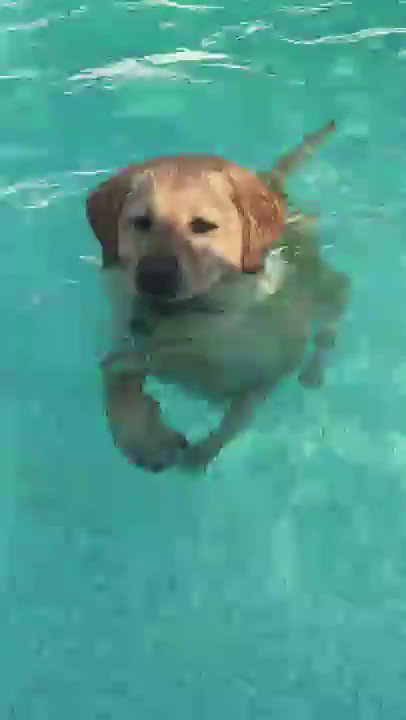

In [87]:
max_retweet_id = tweet_counts_copy.iloc[tweet_counts_copy.retweet_count.idxmax()].tweet_id
max_retweet_count = tweet_counts_copy.iloc[tweet_counts_copy.retweet_count.idxmax()].retweet_count

img_url = image_predictions_copy[image_predictions_copy.tweet_id == max_retweet_id].jpg_url.item()

img_response = requests.get(img_url)
print("Tweet id with maximum retweet counts: ", max_retweet_id)
print("Retweet counts: ", max_retweet_count)
print("It is...")

Image.open(BytesIO(img_response.content))

Tweet id with maximum favorite counts:  744234799360020481
Favorite counts:  163153
It is... again!


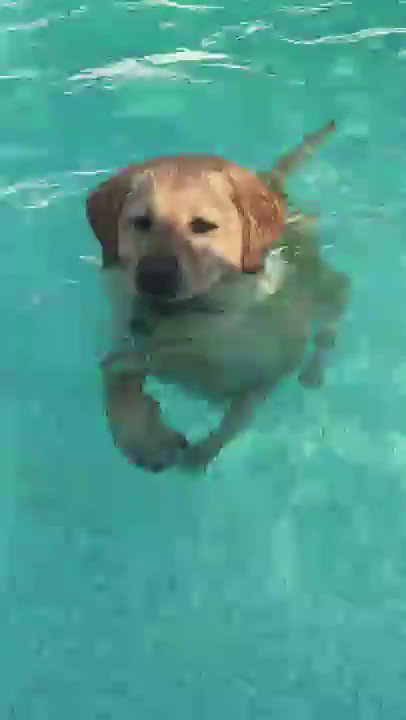

In [89]:
max_favorite_id = tweet_counts_copy.iloc[tweet_counts_copy.favorite_count.idxmax()].tweet_id
max_favorite_count = tweet_counts_copy.iloc[tweet_counts_copy.favorite_count.idxmax()].favorite_count

img_url = image_predictions_copy[image_predictions_copy.tweet_id == max_favorite_id].jpg_url.item()

img_response = requests.get(img_url)
print("Tweet id with maximum favorite counts: ", max_retweet_id)
print("Favorite counts: ", max_favorite_count)
print("It is... again!")

Image.open(BytesIO(img_response.content))

#### 2. Which time of the day does *WeRateDogs* see maximum activity?

In [90]:
temp_archive = archive_copy.copy()
temp_archive.timestamp.head(3)

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
2    2017-07-31 00:18:03 +0000
Name: timestamp, dtype: object

In [91]:
#Storing the hours from timestamp in a new column 'hour'
temp_archive['hour'] = temp_archive.timestamp.str[11:13]

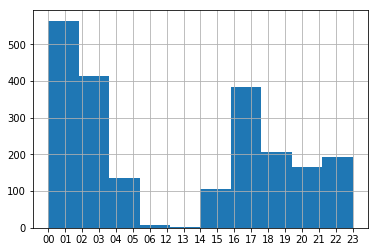

In [92]:
temp_archive['hour'].hist();

We can see that *WeRateDogs* twitter account witnesses highest activity from midnight through 3.00 AM and also in the evening from 16.00 hours through 17.00 hours.

#### 3. From which source most number of tweets have been archived?

In [93]:
temp_archive.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

In [94]:
temp_archive.source.value_counts(normalize = True)

Twitter for iPhone     0.938851
Vine - Make a Scene    0.041839
Twitter Web Client     0.014253
TweetDeck              0.005057
Name: source, dtype: float64

In [95]:
index = temp_archive.source.value_counts().index

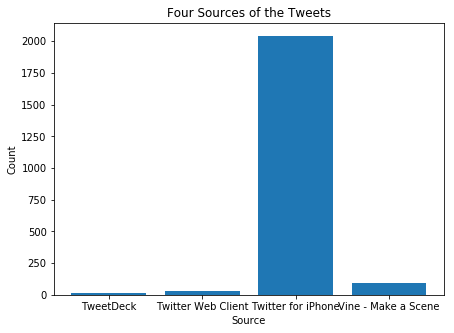

In [96]:
plt.subplots(figsize = (7, 5))
plt.bar(index, temp_archive.source.value_counts());
plt.title("Four Sources of the Tweets")
plt.xlabel("Source")
plt.ylabel("Count");

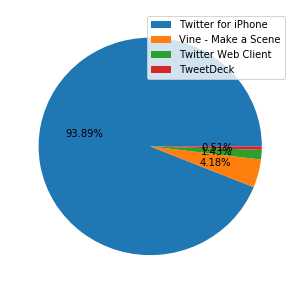

In [97]:
values = temp_archive.source.value_counts(normalize = True).values

def absolute_value(val):
    a  = val
    return (str(round(a,2)) + '%')

plt.subplots(figsize = (5, 5))
plt.pie(values, autopct=absolute_value)
plt.legend(index, loc="best");

Therefore, more than 93 percent of the tweets have been sourced from iPhones.

#### 4. Desriptive statistics of retweet and favourite counts

In [100]:
tweet_counts_copy.retweet_count.describe()

count     2339.000000
mean      2903.256092
std       4895.240298
min          0.000000
25%        583.500000
50%       1354.000000
75%       3383.500000
max      82968.000000
Name: retweet_count, dtype: float64

In [101]:
tweet_counts_copy.favorite_count.describe()

count      2339.000000
mean       7899.706285
std       12244.702768
min           0.000000
25%        1368.000000
50%        3438.000000
75%        9678.500000
max      163153.000000
Name: favorite_count, dtype: float64